In [6]:
import pandas as pd
from warnings import simplefilter; simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
dem_={};gluc_={};crp_={};cbc_={};mortality_={}
cbc_sub=['LBXRDW','LBXWBCSI','LBXLYPCT','LBDLYMNO','LBXRBCSI','LBXHGB','LBXPLTSI']

In [7]:
# "frmgham2.csv": https://gen3.biodatacatalyst.nhlbi.nih.gov/files/dg.4503/9c277b3d-3fab-401e-b1dd-d2e6c7991cbc
# data dic here: https://biolincc.nhlbi.nih.gov/media/teachingstudies/FHS_Teaching_Longitudinal_Data_Documentation_2021a.pdf?link_time=2022-04-18_09:29:24.200176

In [37]:
# read table
public_link='https://raw.githubusercontent.com/singator/bdah/master/data/frmgham2.csv'
df = pd.read_csv(public_link,index_col=0,usecols=['RANDID','PERIOD','AGE','SEX','DEATH','TIMEDTH','GLUCOSE'])
df=df[df['PERIOD']==1].drop('PERIOD',axis=1)
df['TIMEDTH']=df['TIMEDTH']/30/12 # days to years
df.head(2)

,SEX,AGE,GLUCOSE,DEATH,TIMEDTH
RANDID,,,,,
2448,1,39,77.0,0,24.35
6238,2,46,76.0,0,24.35


<Axes: xlabel='timeline'>

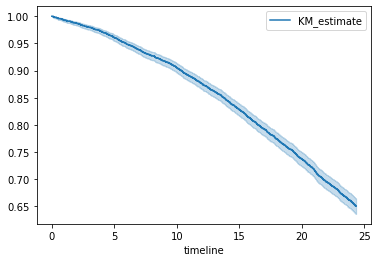

In [38]:
T = df['TIMEDTH']
E = df['DEATH']
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)  # or, more succinctly, kmf.fit(T, E)
kmf.survival_function_
kmf.cumulative_density_
kmf.plot_survival_function()

Text(0, 0.5, 'Survival ratio')

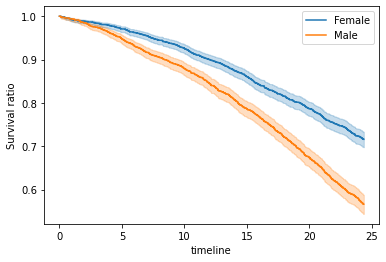

In [39]:
groups = df['SEX']
ix = (groups == 2)

kmf.fit(T[ix], E[ix], label='Female')
ax = kmf.plot_survival_function()

kmf.fit(T[~ix], E[~ix], label='Male')
ax = kmf.plot_survival_function(ax=ax)
ax.set_ylabel('Survival ratio')

In [40]:
Gluc_median=df['GLUCOSE'].median()

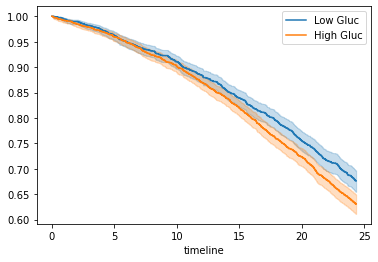

In [41]:
ax=plt.subplot()
groups = df['GLUCOSE']
ix = (groups < Gluc_median)
kmf.fit(T[ix], E[ix], label='Low Gluc')
ax = kmf.plot_survival_function(ax=ax)
kmf.fit(T[~ix], E[~ix], label='High Gluc')
ax = kmf.plot_survival_function()